# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [3]:
library(tidyverse)

url <- "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv"
wind_turbine_data <- read_csv(url)

#head(wind_turbine_data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

province_territory,n
<chr>,<int>
Ontario,2663
Quebec,1991
Alberta,900
Nova Scotia,310
British Columbia,292
Saskatchewan,153
Manitoba,133
New Brunswick,119
Prince Edward Island,104


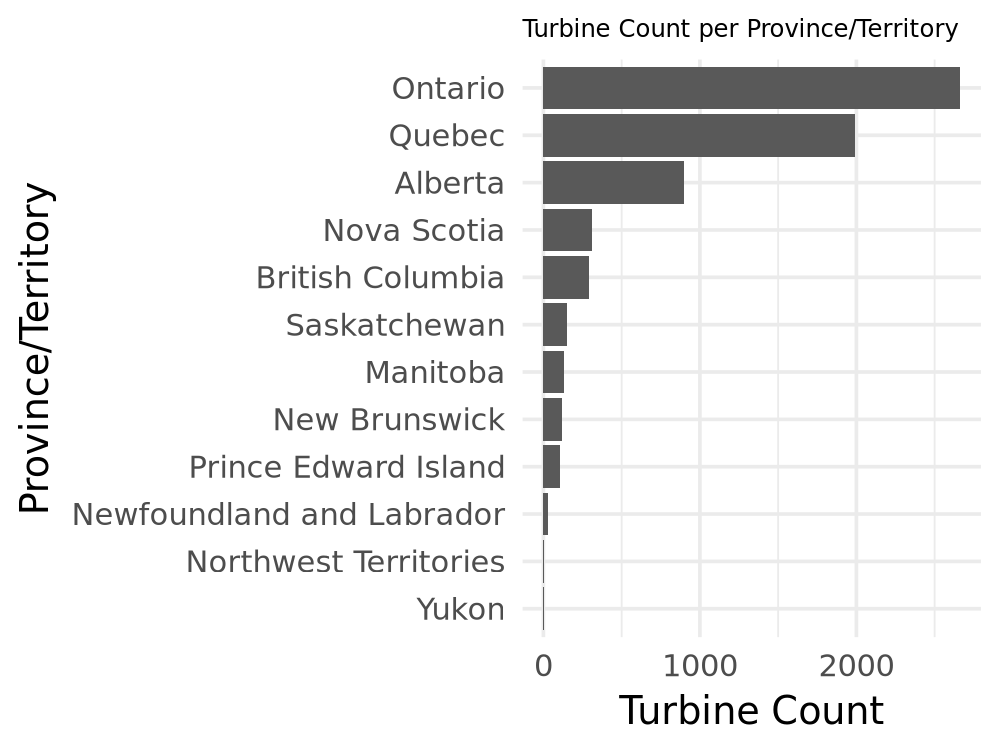

In [13]:
wind_turbine_data %>%
  count(province_territory, sort = TRUE) %>%  # Count and sort by frequency
  mutate(province_territory = fct_reorder(province_territory, n)) %>%  # Reorder factor by count
  ggplot(aes(x = province_territory, y = n)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(
    title = "Turbine Count per Province/Territory",
    x = "Province/Territory",
    y = "Turbine Count"
  ) +
  theme_minimal() + 
theme(
    plot.title = element_text(size = 7)
  )

#wind_turbine_data %>%
  #count(province_territory, sort = TRUE)

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

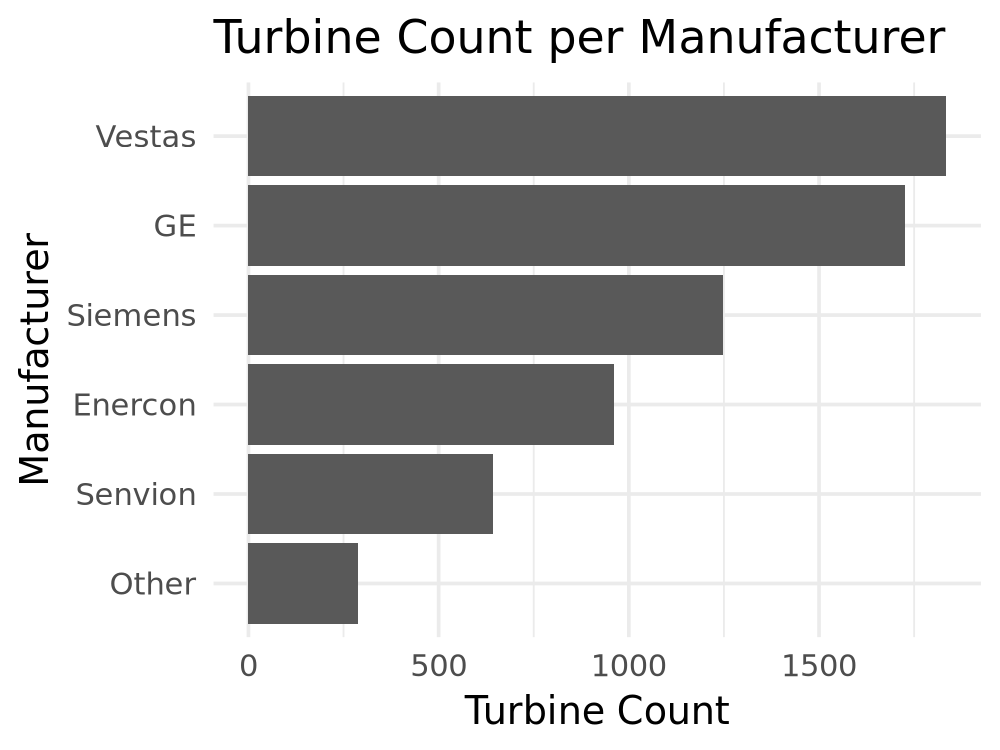

In [33]:
#turbine_counts_by_manufacturer <- wind_turbine_data %>%
  #count(manufacturer, sort = TRUE)

#print(turbine_counts_by_manufacturer)

threshold <- 150  # You can adjust this number as needed

wind_turbine_data %>%
  count(manufacturer, sort = TRUE) %>%
  mutate(manufacturer = if_else(n < threshold, "Other", manufacturer)) %>%
  group_by(manufacturer) %>%
  summarise(total_count = sum(n)) %>%
  mutate(manufacturer = fct_reorder(manufacturer, total_count)) %>%
  arrange(desc(total_count)) %>%
  ggplot(aes(x = manufacturer, y = total_count)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(
    title = "Turbine Count per Manufacturer",
    x = "Manufacturer",
    y = "Turbine Count"
  ) +
  theme_minimal()

Let's make a map of where each turbine is located. 🗺️

In the cell below ⬇️ load the `mapdata` package.

In [37]:
library(mapdata)

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




Now we can retrieve the "data" for a map of Canada. Run this code:

In [38]:
canada = map_data('world', region='Canada')

Are the column names for `latitude` and `longitude` the same for your Canada map data and the turbine data?


No, the column names for latitude and longitude are not be the same between the Canada map data and the turbine data.


Canada Map Data (from map_data('world', region='Canada')):
lat: Latitude
long: Longitude

Turbine Data:
latitude
longitude


The code below creates a map of Canada. Modify the code to add the turbine locations. 

❗️ **Hint:** use `geom_point`. Remember to, 
1. define encodings inside of `geom_point` that work for the **turbine data**, and
2. to override the data in `geom_point` to use the **turbine data** instead of the **Canada map data**. ❗️

[This](https://github.com/chuckpr/BIOS512/blob/main/assignments/2024/map.png?raw=true) is what the map should look like...

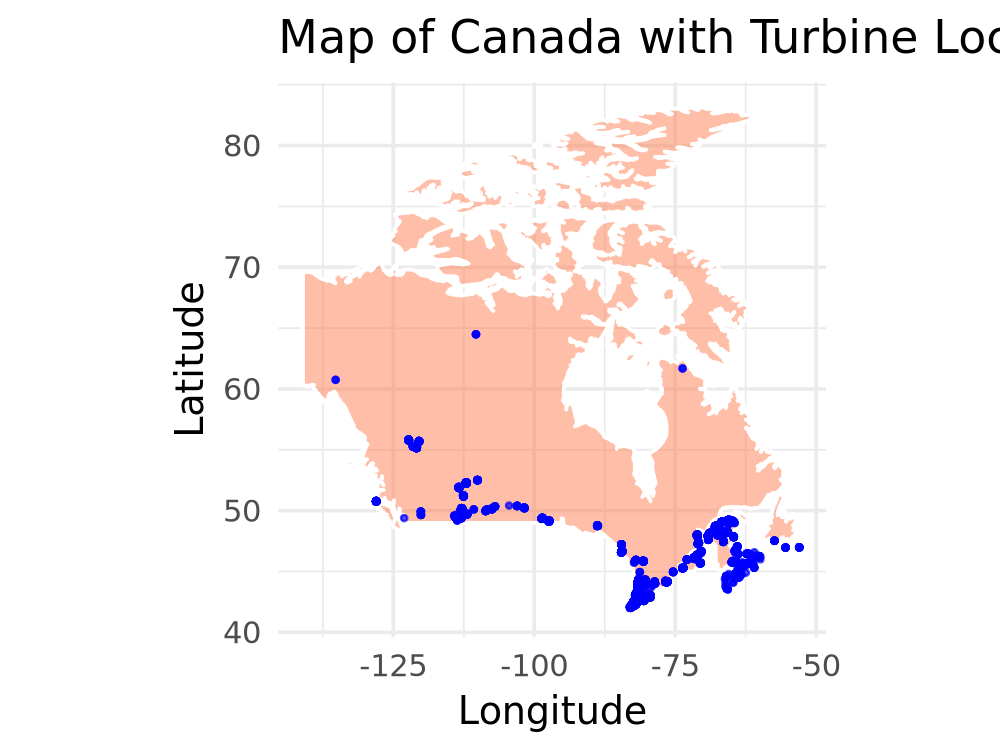

In [39]:
ggplot(data = canada) + 
    geom_polygon(aes(x = long, y = lat, group = group), fill = 'coral', color = "white", alpha = 0.5) + 
    geom_point(data = wind_turbine_data, aes(x = longitude, y = latitude), color = "blue", size = 0.5, alpha = 0.7) + 
    coord_quickmap() +
    labs(
        title = "Map of Canada with Turbine Locations",
        x = "Longitude",
        y = "Latitude"
    ) +
    theme_minimal()